In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('student_info(2).csv')

In [3]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [5]:
df.isna().sum()

study_hours      5
student_marks    0
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.isna().sum()

study_hours      0
student_marks    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  195 non-null    float64
dtypes: float64(2)
memory usage: 4.6 KB


In [9]:
df.describe()

,study_hours,student_marks
count,195.000000,195.000000
mean,6.995949,77.961231
std,1.253060,4.982542
min,5.010000,68.570000
25%,5.775000,73.295000
50%,7.120000,77.780000
75%,8.085000,82.440000
max,8.990000,86.990000


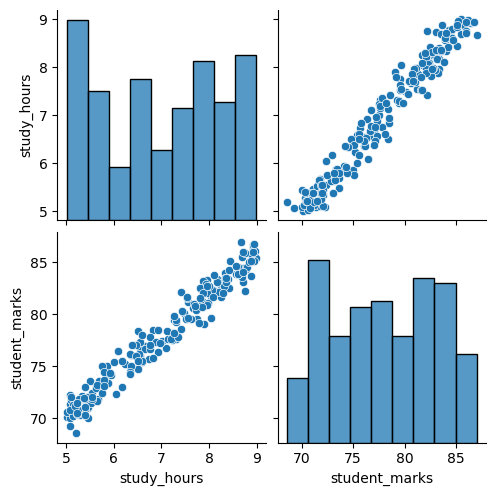

In [10]:
sns.pairplot(df)

<AxesSubplot:>

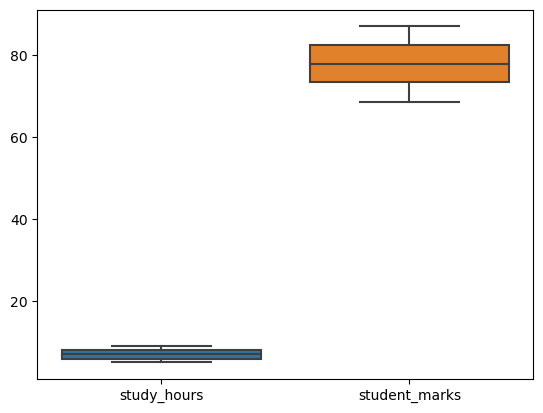

In [11]:
sns.boxplot(df)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [13]:
X=df['study_hours']
X.head()

0    6.83
1    6.56
3    5.67
4    8.67
5    7.55
Name: study_hours, dtype: float64

In [14]:
y=df['student_marks']
y.head()

0    78.50
1    76.74
3    71.82
4    84.19
5    81.18
Name: student_marks, dtype: float64

In [15]:
X_train,X_test,y_train,y_test =train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
y_train.shape

(130,)

In [17]:
X_train = X_train.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)

In [18]:
Lr=LinearRegression()
Lr.fit(X_train,y_train)

LinearRegression()

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [20]:
y_predict = Lr.predict(X_test)

In [21]:
r2_score(y_test, y_predict)

0.9589193570518737

In [22]:
mean_absolute_error(y_test, y_predict)

0.8027011085352038

In [23]:
mean_squared_error(y_test, y_predict)

0.9789766868168873

In [24]:
np.sqrt(mean_squared_error(y_test, y_predict))

0.9894325074591431

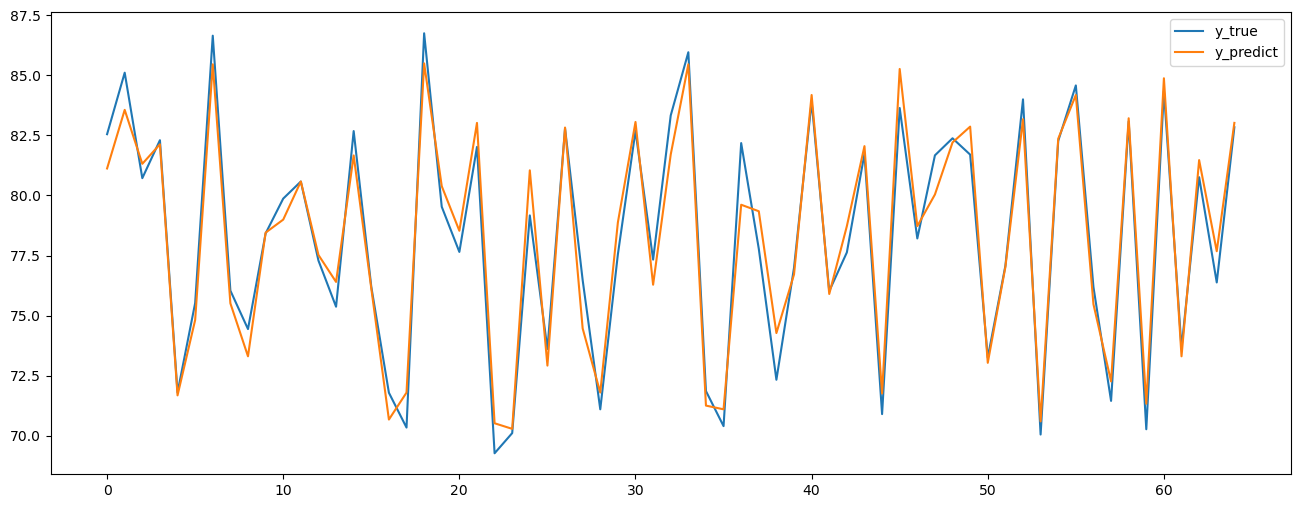

In [25]:
plt.subplots(figsize=(16,6))
x_points = list(range(len(y_test)))
plt.plot(x_points, y_test, label='y_true')
plt.plot(x_points, y_predict, label='y_predict')
plt.legend()
plt.show()

In [44]:
Lr.predict(np.array([[12.685]]))

array([99.99086742])

In [45]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
3,5.67,71.82
4,8.67,84.19
5,7.55,81.18
